In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import dedalus.public as de
from dedalus.tools.array import axslice, reshape_vector
import diagonal

import h5py

# Computing Coefficient Diagonalization

In order to calculate power spectra from CE2, need to extract modes along the diagonal. 

In [2]:
nx = 16
ny = 16

In [3]:
x = de.Fourier('x', nx)
y0 = de.SinCos('y0',ny)
y1 = de.SinCos('y1',ny)

dom = de.Domain([x,y0,y1],grid_dtype='float')

In [4]:
data = dom.new_field()
data.meta['y1']['parity'] = -1
data.meta['y0']['parity'] = -1

In [5]:
xx, yy0, yy1 = dom.grids()
data['g'] = (1 + np.cos(xx) + np.cos(2*xx)) * (np.sin(yy0)*np.sin(2*yy1) + 10*np.sin(yy0)*np.sin(yy1))

In [6]:
op = diagonal.CoefficientDiagonal(data,'y0','y1')

In [7]:
out = op.evaluate()

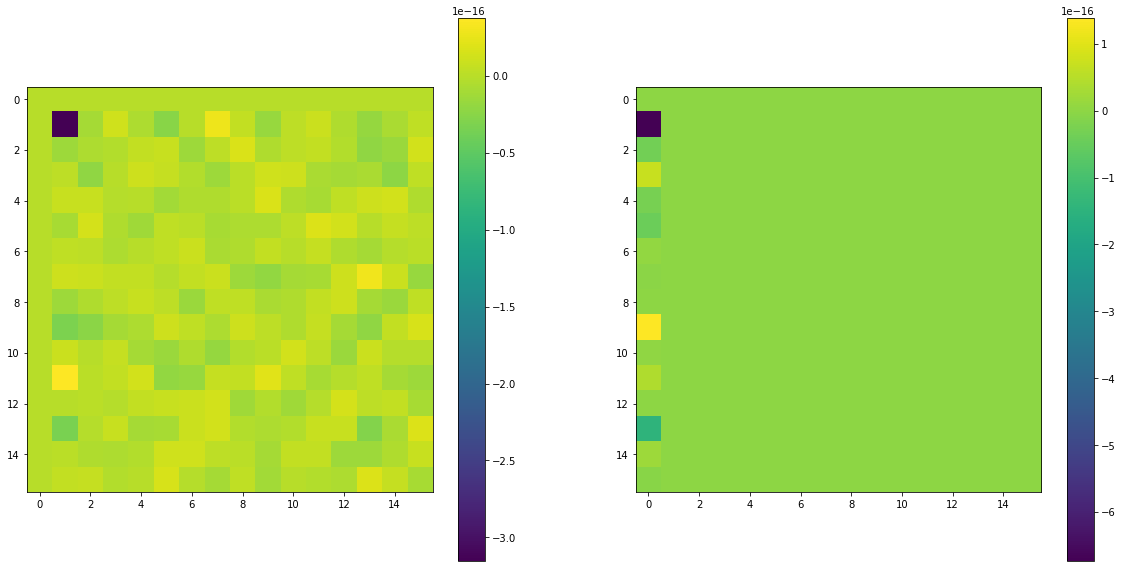

In [14]:
ix = 3
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(data['c'][ix,:,:].real)
plt.colorbar()
plt.subplot(122)
plt.imshow(out['c'][ix,:,:].real)
plt.colorbar()

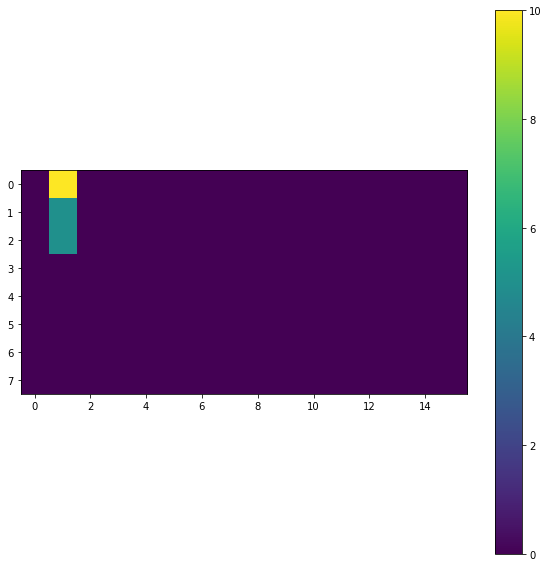

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(out['c'][:,:,0].real)
plt.colorbar()

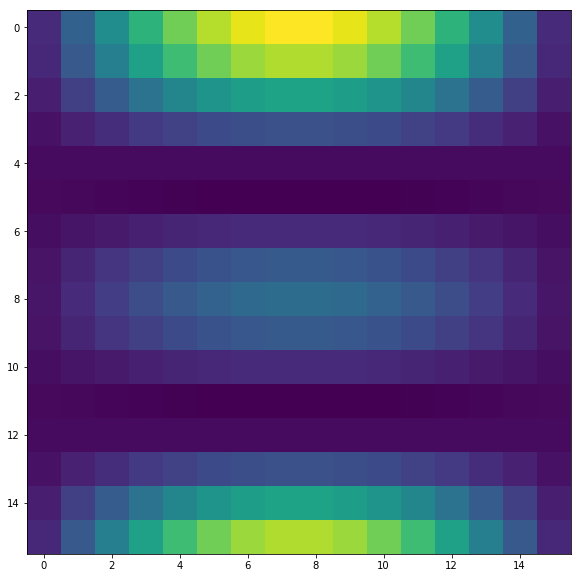

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(out['g'][:,:,0])

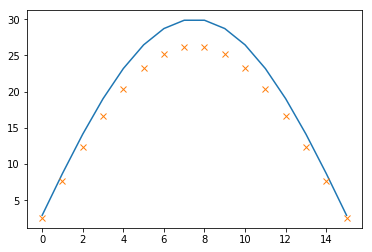

In [10]:
plt.figure()
plt.plot(out['g'][0,:,0])
plt.plot(out['g'][1,:,0],'x')

In [11]:
out['g'][...,:,:].shape

(16, 16, 16)

In [68]:
parallel_data.close()

In [73]:
parallel_data = h5py.File("test_data/test_data_s1.h5","r")

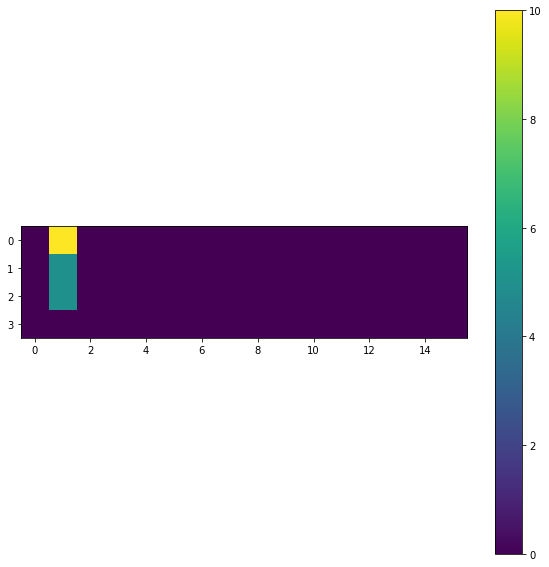

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(parallel_data['tasks/out'][0,:,0,:].real)
plt.colorbar()

In [43]:
parallel_data['tasks/out'].shape

(1, 4, 16, 1)

In [77]:
l = dom.dist.layouts[1]

In [78]:
l.slices??

In [49]:
test_layout = dom.new_field()

In [52]:
test_layout.require_layout(dom.dist.layouts[1])

UndefinedParityError: 

In [56]:
a = np.zeros((16,8))
b = np.zeros((4,16,8))


In [57]:
np.einsum('jk,ikl',a,b).shape

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (16,8)->(16,newaxis,8) (4,16,8)->(4,newaxis,8,16) 